In [14]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

# 1. Data Load

In [15]:
path = ('/users/alexveeren/desktop/desafio_ds/')

In [16]:
df_raw = pd.read_excel(path + '/data/imf-dm-export-20230513.xlsx',sheet_name='NGDP_RPCH')

In [17]:
df_raw.head()

,Real GDP growth (Annual percent change),1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,no data,no data,no data,no data,no data,no data,no data,no data,no data,...,3.9,-2.4,no data,no data,no data,no data,no data,no data,no data,no data
2,Albania,2.7,5.7,2.9,1.1,2,-1.5,5.6,-0.8,-1.4,...,2.1,-3.5,8.5,3.7,2.2,3.3,3.4,3.4,3.4,3.4
3,Algeria,-5.4,3,6.4,5.4,5.6,5.6,-0.2,-0.7,-1.9,...,1,-5.1,3.4,2.9,2.6,2.6,2.2,2.1,1.7,1.8
4,Andorra,no data,no data,no data,no data,no data,no data,no data,no data,no data,...,2,-11.2,8.9,8.7,1.3,1.5,1.5,1.5,1.5,1.5


# 2. Description

In [18]:
df1 = df_raw.copy()

In [19]:
df1.shape

(231, 50)

In [20]:
df1.dtypes.value_counts()

object    50
Name: count, dtype: int64

# Missing Values

In [22]:
df1.isnull().sum().sort_values(ascending=False)

2004                                       3
2016                                       3
2006                                       3
2007                                       3
2008                                       3
2009                                       3
2010                                       3
2011                                       3
2012                                       3
2013                                       3
2014                                       3
2015                                       3
2017                                       3
1980                                       3
2018                                       3
2019                                       3
2020                                       3
2021                                       3
2022                                       3
2023                                       3
2024                                       3
2025                                       3
2026      

Embora as colunas em questão contenham relativamente poucos valores nulos, com no máximo 3 ocorrências, será conduzida uma análise das linhas para determinar se a melhor abordagem é remover ou preencher essas lacunas.

In [23]:
df1[df1['Real GDP growth (Annual percent change)'].isna()].T.isnull().sum()

0      50
229    50
dtype: int64

O código remove todas as linhas do DataFrame df1 onde a coluna 'Real GDP growth (Annual percent change)' possui valores nulos (NaN). Essas linhas são completamente nulas em relação a essa coluna e, portanto, são excluídas do DataFrame.

In [24]:
df1 = df1.dropna(subset=['Real GDP growth (Annual percent change)'])
df1

,Real GDP growth (Annual percent change),1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028
1,Afghanistan,no data,no data,no data,no data,no data,no data,no data,no data,no data,...,3.9,-2.4,no data,no data,no data,no data,no data,no data,no data,no data
2,Albania,2.7,5.7,2.9,1.1,2,-1.5,5.6,-0.8,-1.4,...,2.1,-3.5,8.5,3.7,2.2,3.3,3.4,3.4,3.4,3.4
3,Algeria,-5.4,3,6.4,5.4,5.6,5.6,-0.2,-0.7,-1.9,...,1,-5.1,3.4,2.9,2.6,2.6,2.2,2.1,1.7,1.8
4,Andorra,no data,no data,no data,no data,no data,no data,no data,no data,no data,...,2,-11.2,8.9,8.7,1.3,1.5,1.5,1.5,1.5,1.5
5,Angola,2.4,-4.4,0,4.2,6,3.5,2.9,4.1,6.1,...,-0.7,-5.6,1.1,2.8,3.5,3.7,4,4.1,4.2,4.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,Middle East and Central Asia,-1.9,-0.2,0.4,0.7,0.3,1.2,2,-0.1,3.3,...,1.6,-2.7,4.6,5.3,2.9,3.5,3.6,3.6,3.7,3.7
226,Other advanced economies,3.8,4.2,2.2,4,6.6,4.3,5.5,6.5,5.5,...,2,-1.6,5.4,2.6,1.8,2.2,2.3,2.3,2.2,2.3
227,Sub-Saharan Africa,no data,no data,no data,no data,no data,no data,no data,no data,no data,...,3.3,-1.7,4.8,3.9,3.6,4.2,4.1,4.2,4.3,4.4
228,World,2.1,1.9,0.7,2.6,4.6,3.6,3.6,3.9,4.7,...,2.8,-2.8,6.3,3.4,2.8,3,3.2,3.2,3.1,3


In [26]:
df1 = df1[~(df1['Real GDP growth (Annual percent change)'] == '©IMF, 2023')]
df1

,Real GDP growth (Annual percent change),1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028
1,Afghanistan,no data,no data,no data,no data,no data,no data,no data,no data,no data,...,3.9,-2.4,no data,no data,no data,no data,no data,no data,no data,no data
2,Albania,2.7,5.7,2.9,1.1,2,-1.5,5.6,-0.8,-1.4,...,2.1,-3.5,8.5,3.7,2.2,3.3,3.4,3.4,3.4,3.4
3,Algeria,-5.4,3,6.4,5.4,5.6,5.6,-0.2,-0.7,-1.9,...,1,-5.1,3.4,2.9,2.6,2.6,2.2,2.1,1.7,1.8
4,Andorra,no data,no data,no data,no data,no data,no data,no data,no data,no data,...,2,-11.2,8.9,8.7,1.3,1.5,1.5,1.5,1.5,1.5
5,Angola,2.4,-4.4,0,4.2,6,3.5,2.9,4.1,6.1,...,-0.7,-5.6,1.1,2.8,3.5,3.7,4,4.1,4.2,4.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,Major advanced economies (G7),0.9,2,-0.1,3.3,5,3.8,3,3.5,4.7,...,1.6,-4.5,5.3,2.3,1.1,1.1,1.7,1.8,1.7,1.6
225,Middle East and Central Asia,-1.9,-0.2,0.4,0.7,0.3,1.2,2,-0.1,3.3,...,1.6,-2.7,4.6,5.3,2.9,3.5,3.6,3.6,3.7,3.7
226,Other advanced economies,3.8,4.2,2.2,4,6.6,4.3,5.5,6.5,5.5,...,2,-1.6,5.4,2.6,1.8,2.2,2.3,2.3,2.2,2.3
227,Sub-Saharan Africa,no data,no data,no data,no data,no data,no data,no data,no data,no data,...,3.3,-1.7,4.8,3.9,3.6,4.2,4.1,4.2,4.3,4.4


O código remove todas as linhas do DataFrame df1 onde a coluna '©IMF, 2023' possui valores nulos (NaN). Essas linhas são completamente nulas em relação a essa coluna e, portanto, são excluídas do DataFrame.

In [45]:
df2 = df1.T
new_columns = df2.loc["Real GDP growth (Annual percent change)"]
df2.columns = new_columns
df2 = df2.iloc[1:]
df2 = df2.reset_index().rename(columns={"index": "year"})
df2.rename_axis(None)

Real GDP growth (Annual percent change),year,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Aruba,...,Emerging and Developing Europe,Emerging market and developing economies,Euro area,European Union,Latin America and the Caribbean,Major advanced economies (G7),Middle East and Central Asia,Other advanced economies,Sub-Saharan Africa,World
0,1980,no data,2.7,-5.4,no data,2.4,8.2,0.7,no data,no data,...,-0.8,3.3,no data,1.8,6.4,0.9,-1.9,3.8,no data,2.1
1,1981,no data,5.7,3,no data,-4.4,3.8,-5.7,no data,no data,...,-0.5,1.9,no data,0.1,0.9,2,-0.2,4.2,no data,1.9
2,1982,no data,2.9,6.4,no data,0,-0.1,-3.1,no data,no data,...,1.4,1.5,no data,0.6,-0.5,-0.1,0.4,2.2,no data,0.7
3,1983,no data,1.1,5.4,no data,4.2,5.4,3.7,no data,no data,...,4.6,1.8,no data,1.7,-2.8,3.3,0.7,4,no data,2.6
4,1984,no data,2,5.6,no data,6,10.2,2,no data,no data,...,4.1,4.1,no data,2.5,3.9,5,0.3,6.6,no data,4.6
5,1985,no data,-1.5,5.6,no data,3.5,7.6,-7,no data,no data,...,2.4,3.5,no data,2.2,3.2,3.8,1.2,4.3,no data,3.6
6,1986,no data,5.6,-0.2,no data,2.9,11.5,7.1,no data,no data,...,4.4,4.3,no data,2.7,4.3,3,2,5.5,no data,3.6
7,1987,no data,-0.8,-0.7,no data,4.1,6.6,2.5,no data,16.1,...,5,4,no data,2.6,3.3,3.5,-0.1,6.5,no data,3.9
8,1988,no data,-1.4,-1.9,no data,6.1,5.2,-2,no data,18.6,...,1.6,4.5,no data,3.8,1.1,4.7,3.3,5.5,no data,4.7
9,1989,no data,9.8,4.8,no data,0,5.3,-7,no data,12.1,...,0.1,3.5,no data,3.6,1.1,3.8,4.3,4.6,no data,3.8


In [46]:
df3 = df2.copy()


<Axes: title={'center': 'Missing values'}, ylabel='Real GDP growth (Annual percent change)'>

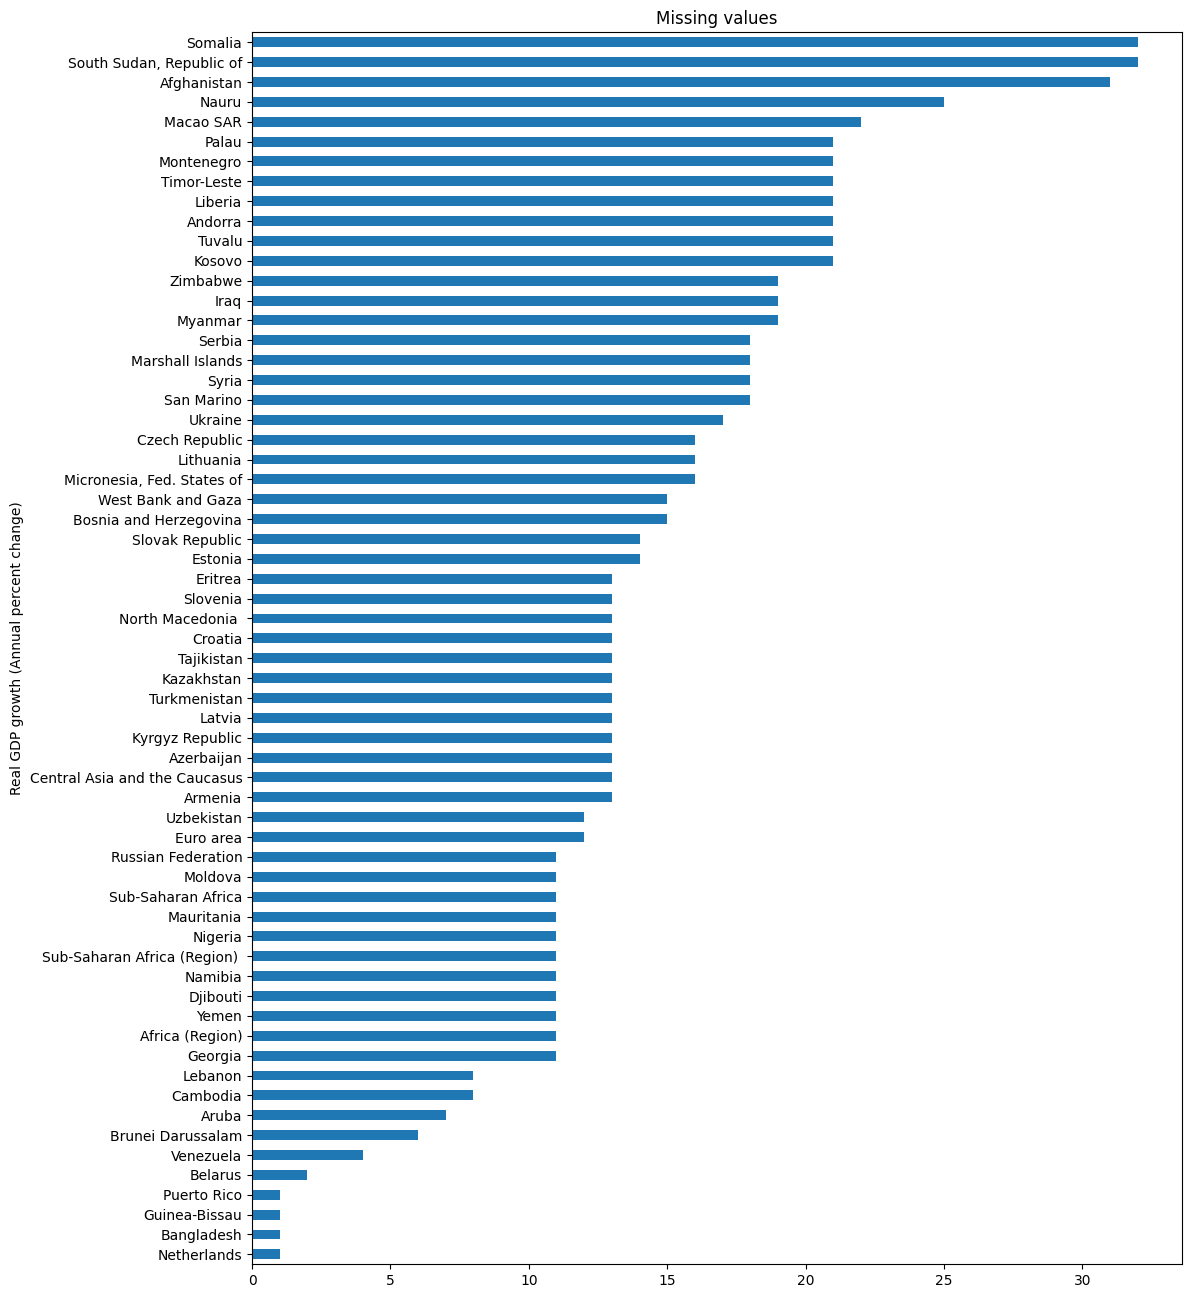

In [53]:
check_no_data = df3.isnull().sum().sort_values()
check_no_data[check_no_data>0].plot(kind='barh', figsize=(12,16), title='Missing values')

In [54]:
len(check_no_data[check_na>0])

62